In [1]:
print("Merhaba, Python çalışıyor!")

Merhaba, Python çalışıyor!


In [2]:
!pip install tensorflow keras numpy matplotlib pandas scikit-learn

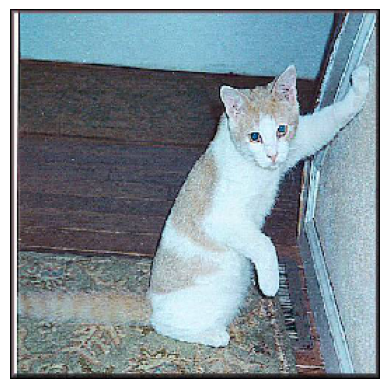

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Örnek bir kedi görselini yükle
img_path = "C:/Users/eylül/Desktop/odev/dataset/cats/cat.4001.jpg"  # Dosya yolunu kendi klasör yapına göre güncelle

# Görseli yükle ve boyutlandır
img = load_img(img_path, target_size=(264, 264))

# Görseli ekranda göster
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Modeli yükleme
model = load_model("C:/Users/eylül/Desktop/odev/cat_dog_classifier.h5")

# Test edilecek görselin yolu
test_image_path = "C:/Users/eylül/Desktop/odev/dataset/dogs/dog.4016.jpg"  # Bir kedi ya da köpek görseli

# Görseli yükleyip ön işleme
img = load_img(test_image_path, target_size=(64, 64))
img_array = img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Modelin beklentisine uygun şekle getir

# Modelin tahmini
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Tahmin: Köpek (%.2f olasılık)" % prediction[0][0])
else:
    print("Tahmin: Kedi (%.2f olasılık)" % (1 - prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Tahmin: Köpek (0.98 olasılık)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# CNN Modelini oluşturma 
model = Sequential([
    Input(shape=(64, 64, 3)),  # Giriş katmanını burada tanımlıyoruz
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # İkili sınıflandırma için
])

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri seti için ön işleme (normalize etme ve ayırma)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Eğitim verisi
train_generator = train_datagen.flow_from_directory(
    "C:/Users/eylül/Desktop/odev/dataset/",  # Dosya yolunu kendi yapına göre güncelle
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

# Doğrulama verisi
validation_generator = train_datagen.flow_from_directory(
    "C:/Users/eylül/Desktop/odev/dataset/",  # Dosya yolunu kendi yapına göre güncelle
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

Found 1619 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,  # Eğitim verisi
    validation_data=validation_generator,  # Doğrulama verisi
    epochs=10  # Eğitim için 10 döngü
)

C:\Users\eylül\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.5438 - loss: 0.7483 - val_accuracy: 0.5149 - val_loss: 0.6915
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.5683 - loss: 0.6842 - val_accuracy: 0.6064 - val_loss: 0.6618
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.6710 - loss: 0.6147 - val_accuracy: 0.6436 - val_loss: 0.6337
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.7268 - loss: 0.5498 - val_accuracy: 0.6460 - val_loss: 0.6168
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.8018 - loss: 0.4678 - val_accuracy: 0.6658 - val_loss: 0.6560
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.8338 - loss: 0.3715 - val_accuracy: 0.6436 - val_loss: 0.6847
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.8583 - loss: 0.3284 - val_accuracy: 0.6757 - val_loss: 0.7446
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.8950 - loss: 0.2521 - val_accuracy: 0

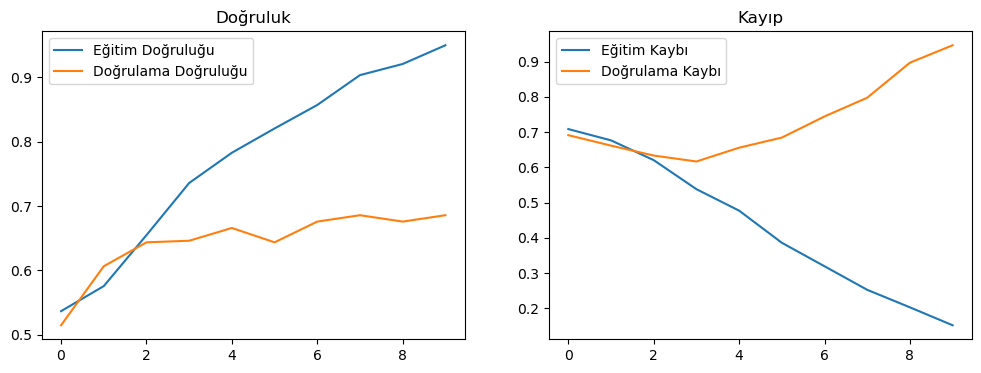

In [8]:
# Eğitim ve doğrulama grafikleri
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(acc, label="Eğitim Doğruluğu")
plt.plot(val_acc, label="Doğrulama Doğruluğu")
plt.title("Doğruluk")
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(loss, label="Eğitim Kaybı")
plt.plot(val_loss, label="Doğrulama Kaybı")
plt.title("Kayıp")
plt.legend()

plt.show()

In [9]:
model.save("cat_dog_classifier.h5")